# take the same setting as Sam for the two agents with quadratic functions, to assess the impact of the initial conditions

In [49]:
import numpy as np # linear algebra
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import copy

%matplotlib inline
%matplotlib widget   



## 2 types of 

functions:

$f_{well}(x_1, x_2) = 0.05x_1^2 + 0.05x_2^2$

$f_{ill}(x_1, x_2) = 0.5x_1^2 + 0.005x_2^2$

- I need a setup in which the agents have a **local optima != global optimum** 
    - such that the consensus term's job is not done by the gradient descent term;
    - such that the integral feedback term relevant

Different initial conditions : we start with the agents 30 degrees apart -> next copndition, we rotate their initial conditions to the right by 30  degrees - total of 12 initial conditions

2 functions: total of 24 trials to run

## Private objectives

The global optimum for these functions must be (0, 0)

### Well-defined Hessian:
$f_1^{well}(x_1, x_2) = 0.05(2-x_1)^2 + 0.05x_2^2$

$f_2^{well}(x_1, x_2) = 0.05(2+x_1)^2 + 0.05x_2^2$

$f_3^{well}(x_1, x_2) = 0.05x_1^2 + 0.05(2-x_2^2)$

$f_4^{well}(x_1, x_2) = 0.05x_1^2 + 0.05(2+x_2^2)$


### Ill-defined Hessian:
$f_1^{ill}(x_1, x_2) = 0.5(2-x_1)^2 + 0.005x_2^2$

$f_2^{ill}(x_1, x_2) = 0.5(2+x_1)^2 + 0.005x_2^2$

$f_3^{ill}(x_1, x_2) = 0.5x_1^2 + 0.005(2-x_2^2)$

$f_4^{ill}(x_1, x_2) = 0.5x_1^2 + 0.005(2+x_2^2)$

In [2]:

def f_global_well(x1, x2):
    return 0.05 * ((2 - x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * ((2 + x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * (x1 ** 2) + 0.05 * ((2 - x2) ** 2) +  0.05 * (x1 ** 2) + 0.05 * ((2 + x2) ** 2)

def f_global_ill(x1, x2):
    return 0.5 * ((2 - x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * ((2 + x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * (x1 ** 2) + 0.005 * ((2 - x2) ** 2) +  0.5 * (x1 ** 2) + 0.005 * ((2 + x2) ** 2)



def f1_well(x1, x2):
    return 0.05 * ((2 - x1) ** 2) + 0.05 * (x2 ** 2)
def f2_well(x1, x2):
    return 0.05 * ((2 + x1) ** 2) + 0.05 * (x2 ** 2)
def f3_well(x1, x2):
    return 0.05 * (x1 ** 2) + 0.05 * ((2 - x2) ** 2)
def f4_well(x1, x2):
    return 0.05 * (x1 ** 2) + 0.05 * ((2 + x2) ** 2)

def f1_ill(x1, x2):
    return 0.5 * ((2 - x1) ** 2) + 0.005 * (x2 ** 2)
def f2_ill(x1, x2):
    return 0.5 * ((2 + x1) ** 2) + 0.005 * (x2 ** 2)
def f3_ill(x1, x2):
    return 0.5 * (x1 ** 2) + 0.005 * ((2 - x2) ** 2)
def f4_ill(x1, x2):
    return 0.5 * (x1 ** 2) + 0.005 * ((2 + x2) ** 2)



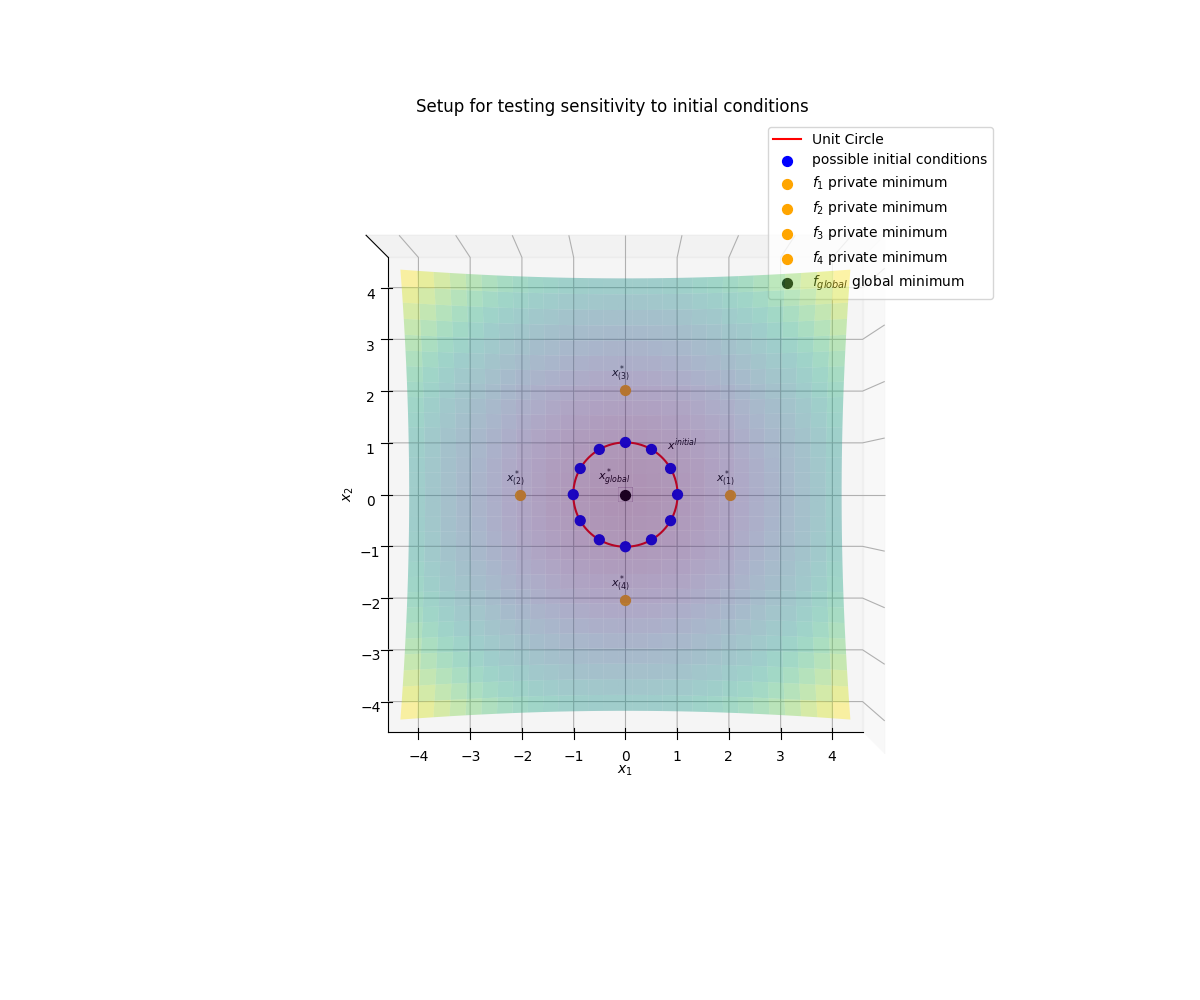

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions and data for Z_well
def f_global_well(x1, x2):
    return 0.5 * (x1 ** 2) + 0.5 * (x2 ** 2)

# Create the figure and axes
fig_well = plt.figure(figsize=(12, 10))
ax_well = plt.axes(projection='3d')
ax_well.view_init(elev=90, azim=-90)

# Plot the surface of Z_well
X1, X2 = np.meshgrid(np.linspace(-4, 4, 30), np.linspace(-4, 4, 30))
Z_well = f_global_well(X1, X2)
ax_well.plot_surface(X1, X2, Z_well, rstride=1, cstride=1, alpha=0.4,
                     cmap='viridis', edgecolor='none')

# Draw a unit circle on the surface of Z_well
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
z_circle = f_global_well(x_circle, y_circle)
ax_well.plot(x_circle, y_circle, z_circle, color='red', label='Unit Circle')

# Plot the dots on the top edge of the circle
theta_dots = np.arange(0, 2*np.pi, np.radians(30))
selected_indices = range(len(theta_dots))  # Indices representing 0, 30, 60, and 90 degrees
x_dots = np.cos(theta_dots[selected_indices])
y_dots = np.sin(theta_dots[selected_indices])
z_dots = f_global_well(x_dots, y_dots)
ax_well.scatter(x_dots, y_dots, z_dots, color="blue", s=50, label="possible initial conditions")

# Annotate the dots with labels

dot_labels = ["", r"$x^{initial}$"]
offset_factor = 1.6  # Adjust the distance of labels from dots
for i, label in enumerate(dot_labels):
    ax_well.text(x_dots[i]*offset_factor, y_dots[i]*offset_factor, z_dots[i]*offset_factor, label, 
                 color='black', fontsize=8, ha='right', va='bottom')

# Additional dots with the same color
additional_dots = [(2, 0, f_global_well(2, 0), "$x_{(1)}^*$", "$f_1$ private minimum" ),
                   (-2, 0, f_global_well(-2, 0), "$x_{(2)}^*$", "$f_2$ private minimum"),
                   (0, 2, f_global_well(0, 2), "$x_{(3)}^*$", "$f_3$ private minimum"),
                   (0, -2, f_global_well(0, -2), "$x_{(4)}^*$", "$f_4$ private minimum")
                 ]

common_color = 'orange'
for dot in additional_dots:
    ax_well.scatter(dot[0], dot[1], dot[2], color=common_color, s=50, label=dot[4])
    # Annotate the dots with labels
    ax_well.text(dot[0]+0.1, dot[1]+0.1, dot[2], dot[3], 
                 color='black', fontsize=8, ha='right', va='bottom')

ax_well.scatter(0, 0, f_global_well(0, 0), color="black", s=50, label="$f_{global}$ global minimum")
ax_well.text(0+0.1, 0+0.1, f_global_well(0, 0), "$x_{global}^*$", 
                 color='black', fontsize=8, ha='right', va='bottom')

ax_well.set_title("Setup for testing sensitivity to initial conditions ")
ax_well.set_xlabel("$x_1$")
ax_well.set_ylabel("$x_2$")
ax_well.set_zticks([])
ax_well.legend()

plt.show()


### 12 initial conditions

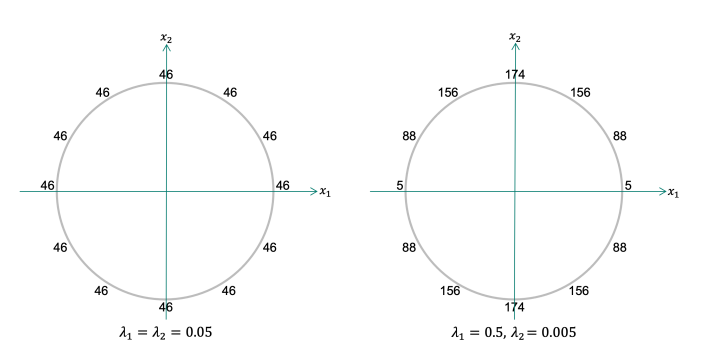

List of 12 elements, each containing coordinates:
[(1.0, 0.0), (0.8660254037844387, 0.49999999999999994), (0.5000000000000001, 0.8660254037844386), (6.123233995736766e-17, 1.0), (-0.4999999999999998, 0.8660254037844387), (-0.8660254037844387, 0.49999999999999994), (-1.0, 1.2246467991473532e-16), (-0.8660254037844386, -0.5000000000000001), (-0.5000000000000004, -0.8660254037844384), (-1.8369701987210297e-16, -1.0), (0.5000000000000001, -0.8660254037844386), (0.8660254037844384, -0.5000000000000004)]


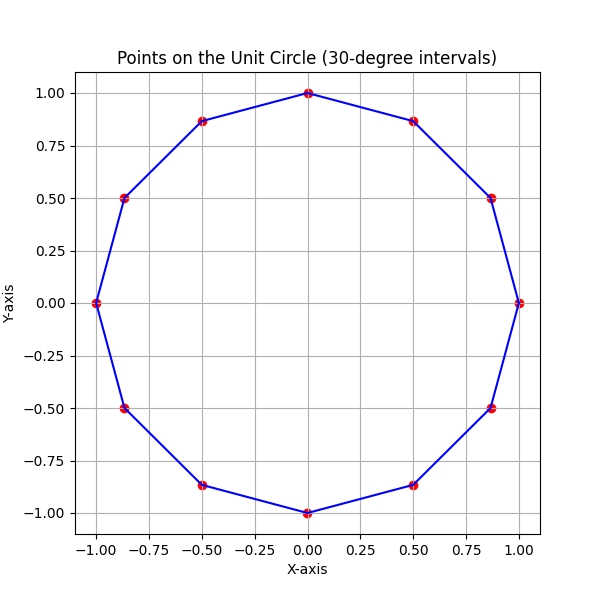

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate points on the unit circle
def generate_unit_circle_points():
    angles = np.arange(0, 360, 30)
    points = [(np.cos(np.radians(angle)), np.sin(np.radians(angle))) for angle in angles]
    return points

# Generate points on the unit circle
unit_circle_points = generate_unit_circle_points()

# Outputting the list of 12 elements, each containing coordinates
print("List of 12 elements, each containing coordinates:")
print(unit_circle_points)

# Plotting the unit circle points
x_coordinates, y_coordinates = zip(*unit_circle_points)
plt.figure(figsize=(6, 6))
plt.scatter(x_coordinates, y_coordinates, color='red')
plt.plot(x_coordinates + (x_coordinates[0],), y_coordinates + (y_coordinates[0],), color='blue')  # Connect the points to form a circle
plt.title('Points on the Unit Circle (30-degree intervals)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


### Simulations for well-defined Hessian

I expect to see the algorithms converge in the same number of iterations, independent of initial conditions

#### Utils

In [56]:
import numpy as np

def get_gradientVector_Autograd(f, x): 

    """
    Parameters
    -----------
    f: function
        An arbitrary function.
    x: array-like
        An array with the (multi-dimensional) point for which the subgradient vector of f is desired.
  
        
    Returns
    ------- 
    numpy array: shape (len(x), 1)
        Gradient vector of f at point x.
            Contains the partial derivatives of f with respect to x_1, ..., x_n.    

    """
    
    import jax
    import jax.numpy as jnp

    # Df = np.zeros((len(x), 1), dtype=int)
    Df = np.zeros_like(x)
    # Df = np.zeros_like(x, dtype= np.float64) # takes 100 iterations
    # Df = np.zeros_like(x, dtype= np.float32) # takes 100 iterations
    # Df = np.zeros_like(x, dtype= np.float128) # jax doesn't accept it 
    # print("Df =",  Df)

    x1, x2 = x[0, 0], x[1, 0]


    f_partial_x1 = jax.grad(f, argnums= 0)
    f_partial_x2 = jax.grad(f, argnums= 1)

    # print("f_partial_x1 = ", f_partial_x1(x1, x2), ". I expect to see sth != 0")
    # print("f_partial_x2 = ", f_partial_x2(x1, x2), ". I expect to see 0")

    Df[0, 0] = f_partial_x1(x1, x2)
    Df[1, 0] = f_partial_x2(x1, x2)
   


    # print("Df = ", Df, f". I expect to see [ [{f_partial_x1(x1, x2)}], [{f_partial_x2(x1, x2)}] ]")
    
    return Df



def step_v3(x, z, fs_private, beta= 0.2, alpha= 3, a= 1, h= 1e-2, subgradient= "autograd"):
    """
    Like step, but agent states get updated all at once, not sequentially.

    Changes the states of our agents based on a step in the optimization process.

    Parameters
    ----------
    h: float > 0
        h used in the Euler method of get_subgradient()
    
    Returns
    --------
    x, z: tupple
        The updated angents's states (x) and updawted auxiliary states (z). 
                                                                                                                                                                    
    """

    n_agents = len(fs_private)


    #------------- first stage -----------------------
    
    # nodes exchanges states x_i and compute auxiliary states z_i.

    for i in range(n_agents):
        
        z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
    #------------- second stage --------------------  
    
    # nodes exchange auxiliary states z_i and update states x_i.
    

    if subgradient == "autograd":
      
    #   print("in step(), we got passed if subgradient == \"autograd\":")
        
      x_aux = np.copy(x)      # using a copy of x in optimization, such that parameters get updated all at once, not sequentially
        
      for i in range(len(fs_private)):
          
            # print("first term (conensus)= ", beta * sum( [ a*(x_aux[j] - x[i]) for j in range(n_agents) if j!= i ] ), "I want [0., 0.], since all agentw start at th esame point")
            # print("second term (integral feedback)= ", beta * sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ))
            # print("third term (gradient descent)= ", beta * alpha * get_gradientVector_Autograd(fs_private[i], x[i]), "I want sth different than [0., 0.] since agent doesn't start at private minimum")
            
            # print("gradient of agent at point", x[i], ": ", get_gradientVector_Autograd(fs_private[i], x[i]), ". Should be != 0 since agent doesn't start at private minimum")


            x[i] = x[i] + beta * sum( [ a*(x_aux[j] - x[i]) for j in range(n_agents) if j!= i ] ) \
                        + beta * sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
                        - beta * alpha * get_gradientVector_Autograd(fs_private[i], x[i])
            # print("in step(), new x[i] = ", x[i], "I want sth differnt than 1.0")

                 
    return x, z

In [ ]:
# dictionary of format {tupple(x_1_initial, x_2_initial) : {"n_iterationsUntilConvergence": n_iterationsUntilConvergence , "last_x": last_x, "x_history": x_history} }
#     last_xs = np array shape (n_agents, n_params)
#           contains the final params of all agents

performance_dict = {}

for x_1_initial, x_2_initial in zip (x_coordinates, y_coordinates):
    
      # assigning the same initial condition to all agents
      x1, x2, x3, x4 = 4 * [np.array(
                                    [ [x_1_initial] ,
                                      [x_2_initial] ]
                                    )]

      # initializing integral terms. 
      # NOTE: each term must be 0
      z1, z2, z3, z4 = 4 * [np.zeros_like(x1)]

      x = [x1, x2, x3, x4]
      z = [z1, z2, z3, z4]
      fs_private = [f1_well, f2_well, f3_well, f4_well]


      # Optimizing

      from v2_utils import step_v3

      x_opt = np.array(
                        [ [0] ,
                              [0] ]
                        )
      max_iterations = 200
      stopping_condition = 0.002

      x_inLast2Iterations = [x, x]

      x_history = []

      for iteration in range(max_iterations):

            # np array of shape = (len(x_inLast2Iterations) * n_agents * n_params, )
                  #   contains the absolute difference of each parameter of the agents in the last 2 iterations from the optimum.
            dif_fromOptimum = np.reshape( [ [ [abs(x_inLast2Iterations[k][i][j,0] - x_opt[j]) for j in range(len(x_inLast2Iterations[0][0]))] for i in range(len(x_inLast2Iterations[0])) ] for k in range(len(x_inLast2Iterations))], newshape= -1)

            if all(dif < stopping_condition for dif in dif_fromOptimum):
                  
                  x_history.append(x)
                  performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 
                  break

            x_history.append(x)

            x, z = step_v3(x, z, fs_private, alpha= 3, beta= 0.2, subgradient= "autograd")
            
            x_inLast2Iterations[0] = x_inLast2Iterations[1]
            x_inLast2Iterations[1] = x

            print(x)



      performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 


In [ ]:
# printing history of agent 1, starting at (1.0, 0.0)

print("shape history all agents: ", np.shape(performance_dict[(1.0, 0.0)]["x_history"]))

# print(performance_dict[(1.0, 0.0)]["x_history"])

print("history agent 1: ", np.shape(performance_dict[(1.0, 0.0)]["x_history"][:, 0, :, :]))   # I want shape (200, 2, 1)

print(performance_dict)

shape history all agents:  (200, 4, 2, 1)
history agent 1:  (200, 2, 1)
{(1.0, 0.0): {'n_iterationsUntilConvergence': 199, 'last_x': [array([[1.],
       [0.]]), array([[1.],
       [0.]]), array([[1.],
       [0.]]), array([[1.],
       [0.]])], 'x_history': array([[[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]]],


       [[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]]],


       [[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]]],


       ...,


       [[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]]],


       [[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.],
         [0.]]],


       [[[1.],
         [0.]],

        [[1.],
         [0.]],

        [[1.

### Plotting perfromance of agent 1 for initial conditions (1.0, 0.0)

I want to see it converge to (0.0, 0.0)

x_1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
x_2:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

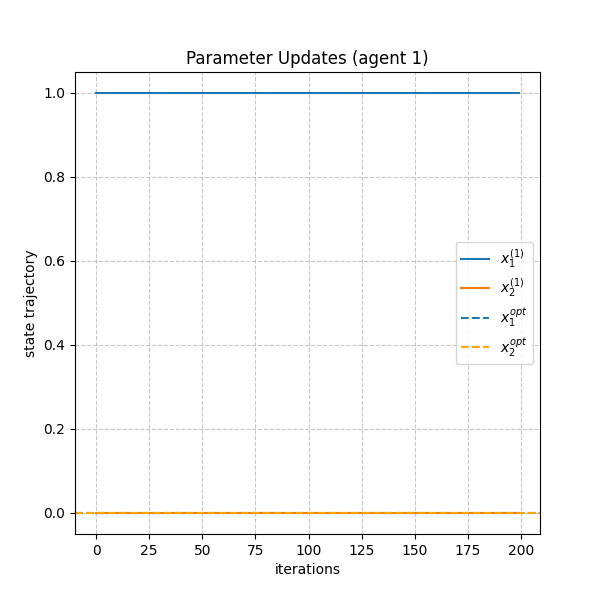

In [ ]:
x_1 = performance_dict[(1.0, 0.0)]["x_history"][:, 0, :, :][:, 0, 0]
x_2 = performance_dict[(1.0, 0.0)]["x_history"][:, 0, :, :][:, 1, 0]

print("x_1: ", x_1)
print("x_2: ", x_2)

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)


ax.plot(range(len(x_1)), x_1, label= r"$x_1^{(1)}$" )
ax.plot(range(len(x_2)), x_2, label= r"$x_2^{(1)}$" )
ax.axhline(y= 0, linestyle='dashed', label= r"$x_1^{opt}$")
ax.axhline(y= 0, linestyle='dashed', label=r"$x_2^{opt}$", color="orange")
ax.set_title("Parameter Updates (agent 1)")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")
ax.grid(True, linestyle='--', alpha=0.7)  
ax.legend()
plt.show()


### Problem: step_v3 doesn't change the agents' state

I must see x_1, x_2 both converge to 0, for initial conditions = (1.0, 0.0)

- [ ] recheck initialization of x
- [ ] print(step_v3(...) shoould return sth != (1.0, 0.0)
- [ ] w/ print statements make sure step_v3 processing goes through
	- [ ] maybe problem with conditional statements

#### only 1 initial condition, make sure it goes through

In [59]:
# dictionary of format {tupple(x_1_initial, x_2_initial) : {"n_iterationsUntilConvergence": n_iterationsUntilConvergence , "last_x": last_x, "x_history": x_history} }
#     last_xs = np array shape (n_agents, n_params)
#           contains the final params of all agents

performance_dict = {}

x_1_initial, x_2_initial = x_coordinates[0], y_coordinates[0]

    
# assigning the same initial condition to all agents
x1, x2, x3, x4 = 4 * [np.array(
                              [ [x_1_initial] ,
                                    [x_2_initial] ]
                              )]


# initializing integral terms. 
# NOTE: each term must be 0
z1, z2, z3, z4 = 4 * [np.zeros_like(x1)]

x = [x1, x2, x3, x4]


# # x initialized appropriately, move on
# print("x initial (I want to see array shape (n_agents, n_params, 1) with the same initial condition for all x): ")
# print("x: ", x)
# print("shape x: ", np.shape(x))

z = [z1, z2, z3, z4]
fs_private = [f1_well, f2_well, f3_well, f4_well]


# Optimizing

# from v2_utils import step_v3

x_opt = np.array(
                  [ [0] ,
                        [0] ]
                  )
max_iterations = 200
stopping_condition = 0.002

x_inLast2Iterations = [copy.deepcopy(x), copy.deepcopy(x)]

x_history = []
last_iteration = 0

for iteration in range(max_iterations):

      last_iteration = iteration + 1
      # np array of shape = (len(x_inLast2Iterations) * n_agents * n_params, )
            #   contains the absolute difference of each parameter of the agents in the last 2 iterations from the optimum.
      dif_fromOptimum = np.reshape( [ [ [abs(x_inLast2Iterations[k][i][j,0] - x_opt[j]) for j in range(len(x_inLast2Iterations[0][0]))] for i in range(len(x_inLast2Iterations[0])) ] for k in range(len(x_inLast2Iterations))], newshape= -1)

      if all(dif < stopping_condition for dif in dif_fromOptimum):
            
            # x_history.append(x)
            performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 
            break


      # PROBLEM: x_history doesn't hold first x =[ [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0] ]
      
      print("x_history = ",  x_history)
      print("shape x_history = ",  np.shape(x_history))



      # PROBLEM: uncommenting this line results in halving the number of iterations -> figure out why, maybe equivalent to doubling beta
      # print(step_v3(x, z, fs_private, alpha= 3, beta= 0.2, subgradient= "autograd"))

      x, z = step_v3(x, z, fs_private, alpha= 3, beta= 0.2, subgradient= "autograd")
      
      x_history.append(x)
      x_inLast2Iterations[0] = copy.deepcopy(x_inLast2Iterations[1])
      x_inLast2Iterations[1] = copy.deepcopy(x)

      # print(x)

print("last_iteration: ", last_iteration)
performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 

x_history =  []
shape x_history =  (0,)
x_history =  [[array([[1.06],
       [0.  ]]), array([[0.81999999],
       [0.        ]]), array([[0.94],
       [0.12]]), array([[ 0.94],
       [-0.12]])]]
shape x_history =  (1, 4, 2, 1)
x_history =  [[array([[0.9436],
       [0.    ]]), array([[0.8236],
       [0.    ]]), array([[0.88359999],
       [0.06      ]]), array([[ 0.88359999],
       [-0.06      ]])], [array([[0.9436],
       [0.    ]]), array([[0.8236],
       [0.    ]]), array([[0.88359999],
       [0.06      ]]), array([[ 0.88359999],
       [-0.06      ]])]]
shape x_history =  (2, 4, 2, 1)
x_history =  [[array([[0.843784],
       [0.      ]]), array([[0.81738399],
       [0.        ]]), array([[0.83058399],
       [0.01319999]]), array([[ 0.83058399],
       [-0.01319999]])], [array([[0.843784],
       [0.      ]]), array([[0.81738399],
       [0.        ]]), array([[0.83058399],
       [0.01319999]]), array([[ 0.83058399],
       [-0.01319999]])], [array([[0.843784],
       [0.

In [35]:
print(performance_dict[(1.0, 0.0)]["x_history"])

[[[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]

  [[0.00193158]
   [0.        ]]]


 [[[0.00193158]
   [0.        ]]



x_1:  [0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158
 0.00193158 0.00193158 0.00193158 0.00193158 0.00193158 

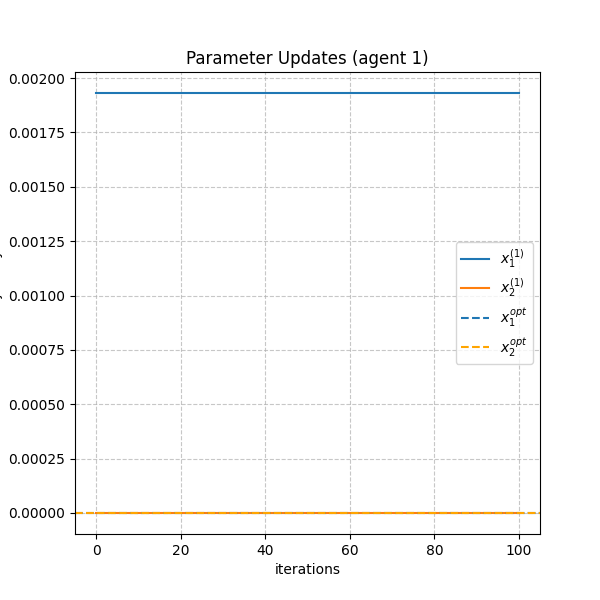

In [39]:
x_1 = performance_dict[(1.0, 0.0)]["x_history"][:, 0, :, :][:, 0, 0]
x_2 = performance_dict[(1.0, 0.0)]["x_history"][:, 0, :, :][:, 1, 0]


print("x_1: ", x_1)
print("x_2: ", x_2)

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)


ax.plot(range(len(x_1)), x_1, label= r"$x_1^{(1)}$" )
ax.plot(range(len(x_2)), x_2, label= r"$x_2^{(1)}$" )
ax.axhline(y= 0, linestyle='dashed', label= r"$x_1^{opt}$")
ax.axhline(y= 0, linestyle='dashed', label=r"$x_2^{opt}$", color="orange")
ax.set_title("Parameter Updates (agent 1)")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")
ax.grid(True, linestyle='--', alpha=0.7)  
ax.legend()
plt.show()


### Hyperparameters

stopping condition $\epsilon= 0.002$ 

# Optimization process

## Helper functions

In [7]:
import numpy as np

def get_gradientVector_Autograd(f, x): 

    """
    Parameters
    -----------
    f: function
        An arbitrary function.
    x: array-like
        An array with the (multi-dimensional) point for which the subgradient vector of f is desired.
  
        
    Returns
    ------- 
    numpy array: shape (len(x), 1)
        Gradient vector of f at point x.
            Contains the partial derivatives of f with respect to x_1, ..., x_n.    

    """
    
    import jax

    Df = np.zeros((len(x), 1), dtype=int)

    x1, x2 = x[0, 0], x[1, 0]


    f_partial_x1 = jax.grad(f, argnums= 0)
    f_partial_x2 = jax.grad(f, argnums= 1)

    Df[0, 0] = f_partial_x1(x1, x2)
    Df[1, 0] = f_partial_x2(x1, x2)

    return Df



def step_v3(x, z, fs_private, beta= 0.2, alpha= 3, a= 1, h= 1e-2, subgradient= "autograd"):
    """
    Like step, but agent states get updated all at once, not sequentially.

    Changes the states of our agents based on a step in the optimization process.

    Parameters
    ----------
    h: float > 0
        h used in the Euler method of get_subgradient()
    
    Returns
    --------
    x, z: tupple
        The updated angents's states (x) and updawted auxiliary states (z). 
                                                                                                                                                                    
    """

    n_agents = len(fs_private)


    gradient_vectors_Analytic = [ lambda x: np.array( 
                                            [ 
                                                2 * P[i][0][0]* x[0] + (P[i][1][0]+P[i][0][1])* x[1] + b[i][0], 
                                                2 * P[i][1][1]* x[1] + (P[i][1][0]+P[i][0][1])* x[0] + b[i][1]  
                                            ]

                                            )
                                for i in range(n_agents) ]


    #------------- first stage -----------------------
    
    # nodes exchanges states x_i and compute auxiliary states z_i.

    for i in range(n_agents):
        
        z[i] = z[i] + beta*sum( [ a*(x[i] - x[j]) for j in range(n_agents) if j!= i ]  )

    
    #------------- second stage --------------------  
    
    # nodes exchange auxiliary states z_i and update states x_i.
    

    if subgradient == "autograd":
        
      x_aux = np.copy(x)      # using a copy of x in optimization, such that parameters get updated all at once, not sequentially
        
      for i in range(len(fs_private)):
          
            x[i] = x[i] + beta * sum( [ a*(x_aux[j] - x[i]) for j in range(n_agents) if j!= i ] ) \
                        + beta * sum( [ a*(z[j] - z[i]) for j in range(n_agents) if j!= i ] ) \
                        - beta * alpha * get_gradientVector_Autograd(fs_private[i], x[i])

                 
    return x, z


## Optimizing

In [13]:


initial_conditions = unit_circle_points




def optimize(x, f, x_opt, max_iterations = 200, stopping_condition = 0.002):
        
    """
    Parameters
    ----------

    x: np array shape (n_parameters, 1)

        array with the initial parameters to optimize.

    x_opt: np array shape (n_parameters, 1) 

        array with the optimal parameters for minimizing f.

    f: func

        function to minimize with respect to x.

    max_iterations: int > 0

        maximum ampunt of iterations to perform in case the algorithm does not converge
    
    stopping_condition = 0.002

        a new step is taken as long as the absolute value between the two last approximations
        is greater than stopping_condition. 

        So, when we say that the algorithm has “converged” - we mean that taking additional steps from that point will not make a significant
        difference to x_star.

        
    Returns
    -------
    x_star: numpy array shape(len(x), 1)
    
        x after the optimization process.
    
    """

    x_inLast2Iterations = [x, x]

    x_history = []

    
    
    z = np.zeros_like(x)


    for _ in range(max_iterations):
        
        if abs(x_inLast2Iterations[0][0] - x_opt[0]) < stopping_condition and \
           abs(x_inLast2Iterations[0][1] - x_opt[1]) < stopping_condition and \
           abs(x_inLast2Iterations[1][1] - x_opt[0]) < stopping_condition and \
           abs(x_inLast2Iterations[1][1] - x_opt[1]) < stopping_condition:
                
                break

        x, z = step_v3(x, z, f, alpha= 3, beta= 0.2, subgradient= "autograd")
        x_history.append(x)



performance_dict_f1 = {}
performance_dict_f2 = {}

"""
performance_dict : type= dict

    Dictionary of format {tupple(x1_initial, x2_initial) : n_iterationsUntilConvergence}

"""


x_opt = np.array(
        [ [0.], 
          [0.] ]
        )

for initial_condition in initial_conditions:
    performance_dict_f1[initial_condition] = optimize(x= initial_condition, x_opt= x_opt,  f= f1, max_iterations = 100, stopping_condition = 0.002)

for initial_condition in initial_conditions:
    performance_dict_f2[initial_condition] = optimize(x= initial_condition, x_opt= x_opt, f= f2, max_iterations = 100, stopping_condition = 0.002)



print(performance_dict_f1)

TypeError: object of type 'function' has no len()